In [2]:
import os
import json
import pandas as pd
project_rootdir = "/home/shuang/projects/kaggle/cooking"

In [3]:
train_data_path = os.path.join(project_rootdir, "data", "train.json")

In [5]:
with open(train_data_path, "r") as f:
    train_data = json.load(f)

In [12]:
train_data[0].keys()
data = []
index = []
for item in train_data:
    index.append(item["id"])
    data.append([item["cuisine"], item["ingredients"]])

In [13]:
train_dataframe = pd.DataFrame(data=data, index=index, columns=["cuisine","ingredients"])

In [14]:
train_dataframe.head()

,cuisine,ingredients
10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
22213,indian,"[water, vegetable oil, wheat, salt]"
13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [15]:
train_dataframe["num_ingredients"] = [len(item) for item in train_dataframe["ingredients"]]

In [16]:
train_dataframe.head()

,cuisine,ingredients,num_ingredients
10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
22213,indian,"[water, vegetable oil, wheat, salt]",4
13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([2.150e+02, 5.490e+02, 1.128e+03, 4.553e+03, 3.329e+03, 3.556e+03,
        3.753e+03, 7.189e+03, 3.146e+03, 2.698e+03, 4.062e+03, 1.439e+03,
        1.160e+03, 8.790e+02, 1.114e+03, 3.130e+02, 2.180e+02, 2.320e+02,
        7.200e+01, 4.600e+01, 2.000e+01, 4.800e+01, 1.500e+01, 1.100e+01,
        4.000e+00, 7.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 1.  ,  2.28,  3.56,  4.84,  6.12,  7.4 ,  8.68,  9.96, 11.24,
        12.52, 13.8 , 15.08, 16.36, 17.64, 18.92, 20.2 , 21.48, 22.76,
        24.04, 25.32, 26.6 , 27.88, 29.16, 30.44, 31.72, 33.  , 34.28,
        35.56, 36.84, 38.12, 39.4 , 40.68, 41.96, 43.24, 44.52, 45.8 ,
        47.08, 48.36, 49.64, 50.92, 52.2 , 53.48, 54.76, 56.04, 57.32,
        58.6 , 59.88,

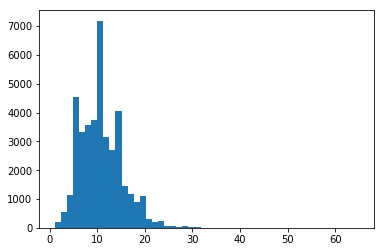

In [19]:
plt.hist(train_dataframe["num_ingredients"], bins=50)

In [20]:
train_dataframe["cuisine"].unique()

array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

In [32]:
train_dataframe["cuisine"].describe()

count       39774
unique         20
top       italian
freq         7838
Name: cuisine, dtype: object

In [43]:
per_cuisine_ingredients = {}
for cuisine_type in train_dataframe["cuisine"].unique():
    ingredients = {}
    for item in train_dataframe["ingredients"][train_dataframe["cuisine"]==cuisine_type].values:
        for stuff in item:
            if stuff in ingredients:
                ingredients[stuff] += 1
            else:
                ingredients[stuff] = 1
    per_cuisine_ingredients[cuisine_type] = ingredients

In [44]:
print(per_cuisine_ingredients.keys())

dict_keys(['greek', 'southern_us', 'filipino', 'indian', 'jamaican', 'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai', 'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese', 'irish', 'korean', 'moroccan', 'russian'])


In [35]:
subdata = train_dataframe["num_ingredients"][train_dataframe["cuisine"]=="greek"]
subdata.values

array([ 9,  6,  6, ...,  8,  4, 16])

(array([ 15., 177., 229., 367., 174., 148.,  49.,  12.,   1.,   3.]),
 array([ 1. ,  3.6,  6.2,  8.8, 11.4, 14. , 16.6, 19.2, 21.8, 24.4, 27. ]),
 <a list of 10 Patch objects>)

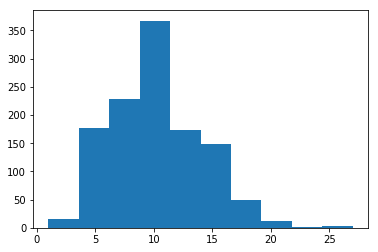

In [36]:
plt.hist(subdata)

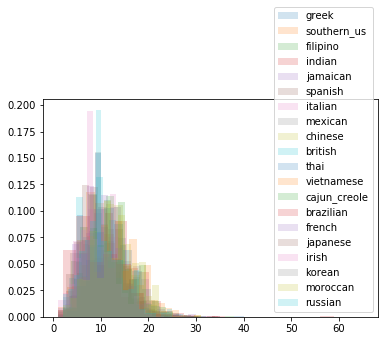

In [46]:
f = plt.figure()
ax = f.add_subplot(111)
for cuisine_type in train_dataframe["cuisine"].unique():
    subdata = train_dataframe["num_ingredients"][train_dataframe["cuisine"]==cuisine_type]
#     print(subdata.shape[0])
    ax.hist(subdata.values, bins=20, label=cuisine_type, density=True, alpha=0.2)
plt.legend()
plt.show()